1. What is the approximate depth of a Decision Tree trained (without restrictions) on a training set with 1 million instances?

The depth of a well-balanced binary tree containing m leaves is equal to log2(m)3, rounded up. A binary Decision Tree (one that makes only binary decisions, as is the case of all trees in Scikit-Learn) will end up more or less well balanced at the end of training, with one leaf per training instance if it is trained without restrictions. Thus, if the training set contains one million instances, the Decision Tree will have a depth of log2(106) ≈ 20 (actually a bit more since the tree will generally not be perfectly well balanced).

2. Is a node’s Gini impurity generally lower or greater than its parent’s? Is it generally lower/greater, or always lower/greater?

A node’s Gini impurity is generally lower than its parent’s. This is due to the CART training algorithm’s cost function, which splits each node in a way that minimizes the weighted sum of its children’s Gini impurities. However, it is possible for a node to have a higher Gini impurity than its parent, as long as this increase is more than compensated for by a decrease of the other child’s impurity. For example, consider a node containing four instances of class A and 1 of class B. Its Gini impurity is 1 minus one-fifth squared minus four-fifths squared = 0.32. Now suppose the dataset is one-dimensional and the instances are lined up in the following order: A, B, A, A, A. You can verify that the algorithm will split this node after the second instance, producing one child node with instances A, B, and the other child node with instances A, A, A. The first child node’s Gini impurity is 1 minus one-half squared minus one-half squared = 0.5, which is higher than its parent. This is compensated for by the fact that the other node is pure, so the overall weighted Gini impurity is two-fifths times 0.5 + three-fifths times 0 = 0.2 , which is lower than the parent’s Gini impurity.

3. If a Decision Tree is overfitting the training set, is it a good idea to try decreasing max_depth?

If a Decision Tree is overfitting the training set, it may be a good idea to decrease max_depth, since this will constrain the model, regularizing it.

4. If a Decision Tree is underfitting the training set, is it a good idea to try scaling the input features?

Decision Trees don’t care whether or not the training data is scaled or centered; that’s one of the nice things about them. So if a Decision Tree underfits the training set, scaling the input features will just be a waste of time.

5. If it takes one hour to train a Decision Tree on a training set containing 1 million instances, roughly how much time will it take to train another Decision Tree on a training set containing 10 million instances?

The computational complexity of training a Decision Tree is O(n × m log(m)). So if you multiply the training set size by 10, the training time will be multiplied by K = (n × 10m × log(10m)) / (n × m × log(m)) = 10 × log(10m) / log(m). If m = 106, then K ≈ 11.7, so you can expect the training time to be roughly 11.7 hours.

6. If your training set contains 100,000 instances, will setting presort=True speed up training?

Presorting the training set speeds up training only if the dataset is smaller than a few thousand instances. If it contains 100,000 instances, setting presort=True will considerably slow down training.


## Problem 7

Train and fine-tune a Decision Tree for the moons dataset.

a. Generate a moons dataset using make_moons(n_samples=10000, noise=0.4).

b. Split it into a training set and a test set using train_test_split().

c. Use grid search with cross-validation (with the help of the GridSearchCV class) to find good hyperparameter values for a DecisionTreeClassifier. Hint: try various values for max_leaf_nodes.

d. Train it on the full training set using these hyperparameters, and measure your model’s performance on the test set. You should get roughly 85% to 87% accuracy.

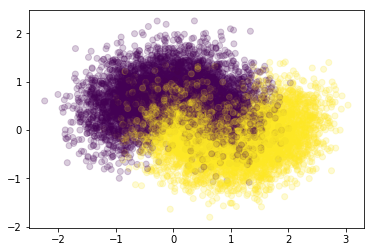

In [76]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

x, y = make_moons(n_samples = 10000, noise = 0.4)


plt.scatter(x[:,0], x[:,1], c = y, alpha = 0.2)
plt.show()

In [77]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y)

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

tree_clf = DecisionTreeClassifier()

steps = np.arange(5, 100, 5)
steps = np.append(steps, [200, 1000, 10000])

params = {
    "max_leaf_nodes": steps
}

gs = GridSearchCV(tree_clf, params)


In [79]:
gs.fit(x_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_leaf_nodes': array([    5,    10,    15,    20,    25,    30,    35,    40,    45,
          50,    55,    60,    65,    70,    75,    80,    85,    90,
          95,   200,  1000, 10000])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [80]:
cvres = gs.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.8513333333333334 {'max_leaf_nodes': 5}
0.8525333333333334 {'max_leaf_nodes': 10}
0.8541333333333333 {'max_leaf_nodes': 15}
0.8521333333333333 {'max_leaf_nodes': 20}
0.8518666666666667 {'max_leaf_nodes': 25}
0.85 {'max_leaf_nodes': 30}
0.8501333333333333 {'max_leaf_nodes': 35}
0.8484 {'max_leaf_nodes': 40}
0.8489333333333333 {'max_leaf_nodes': 45}
0.8474666666666667 {'max_leaf_nodes': 50}
0.8461333333333333 {'max_leaf_nodes': 55}
0.8465333333333334 {'max_leaf_nodes': 60}
0.8456 {'max_leaf_nodes': 65}
0.8458666666666667 {'max_leaf_nodes': 70}
0.8453333333333334 {'max_leaf_nodes': 75}
0.8462666666666666 {'max_leaf_nodes': 80}
0.8461333333333333 {'max_leaf_nodes': 85}
0.8441333333333333 {'max_leaf_nodes': 90}
0.8432 {'max_leaf_nodes': 95}
0.8329333333333333 {'max_leaf_nodes': 200}
0.7896 {'max_leaf_nodes': 1000}
0.7910666666666667 {'max_leaf_nodes': 10000}


In [81]:
def plotTreeReg(clf, datx, daty):
    x0s = np.linspace(min(datx[:,0]), max(datx[:,1]), 100)
    x1s = np.linspace(min(datx[:,1]), max(datx[:,1]), 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    x = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(x).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)   
#     xran = np.linspace(xmin, xmax, 100)
#     y_pred = clf.predict(xran.reshape(-1,1))
#     plt.plot(x, y, 'bo')
#     plt.plot(xran, y_pred, 'g-', linewidth = 2)

# def plot_predictions(clf, axes):
#     x0s = np.linspace(axes[0], axes[1], 100)
#     x1s = np.linspace(axes[2], axes[3], 100)
#     x0, x1 = np.meshgrid(x0s, x1s)
#     X = np.c_[x0.ravel(), x1.ravel()]
#     y_pred = clf.predict(X).reshape(x0.shape)
#     y_decision = clf.decision_function(X).reshape(x0.shape)
#     plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
#     plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

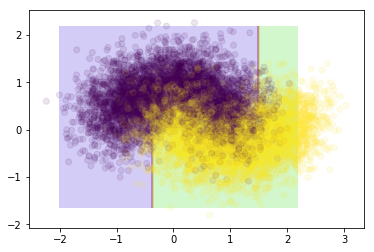

In [82]:
tree_best = gs.best_estimator_

plotTreeReg(tree_best, x_test, y_test)
plt.scatter(x[:,0], x[:,1], c = y, alpha = 0.1)
plt.show()

In [86]:
# Calculate final score for classifier on test set

print("Train: ", tree_best.score(x_train, y_train))
print("Test: ", tree_best.score(x_test, y_test))

Train:  0.8586666666666667
Test:  0.8616


8. Grow a forest.

    a. Continuing the previous exercise, generate 1,000 subsets of the training set, each containing 100 instances selected randomly. Hint: you can use Scikit-Learn’s ShuffleSplit class for this.

    b. Train one Decision Tree on each subset, using the best hyperparameter values found above. Evaluate these 1,000 Decision Trees on the test set. Since they were trained on smaller sets, these Decision Trees will likely perform worse than the first Decision Tree, achieving only about 80% accuracy.

    c. Now comes the magic. For each test set instance, generate the predictions of the 1,000 Decision Trees, and keep only the most frequent prediction (you can use SciPy’s mode() function for this). This gives you majority-vote predictions over the test set.

    d. Evaluate these predictions on the test set: you should obtain a slightly higher accuracy than your first model (about 0.5 to 1.5% higher). Congratulations, you have trained a Random Forest classifier!

In [88]:
#A

from sklearn.model_selection import ShuffleSplit

splits = ShuffleSplit(1000, train_size = .01)

/Users/mike/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1639: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [97]:
#B
scores = np.array([])
for train_idx, test_idx in splits.split(x):
    tree_best.fit(x[train_idx], y[train_idx])
    scores = np.append(scores, tree_best.score(x[test_idx], y[test_idx]))
print("Max: ", max(scores))
print("Min: ", min(scores))


Max:  0.873
Min:  0.669


In [160]:
#C
test_pred = np.empty((x.shape[0], splits.get_n_splits()))
test_pred.fill(np.nan)
for i, idx in enumerate(splits.split(x)):
    train_idx = idx[0]
    test_idx = idx[1]
    tree_best.fit(x[train_idx], y[train_idx])
    test_pred[test_idx,i] = tree_best.predict(x[test_idx,:])

In [154]:
import collections
collections.Counter(test_pred.flatten())

Counter({-1.0: 9000000, 1.0: 499959, 0.0: 500041})

In [157]:
from scipy import stats

stats.mode(test_pred)

ModeResult(mode=array([[-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1